### Exploratory Data Analysis code for collected sensor data

Sensor Data EXP1

- Experiment duration: 29.03.2024 - 03.04.2024 (start time around 5PM evening)
- Total samples: 43,416
- Sampling Period: 10 seconds
- Microcontroller: rpi picoW
- Sensor: Bosch BMP280 temperature pressure sensor
- Sensor data transfer from sensor to MCU via I2C
- Sensor data transfer to server via MQTT Wirelessly
- Data logging using Node-red flow into CSV files



In [10]:
### Required libraraies and modules

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
%matplotlib inline


In [11]:
# Figure settings

sns.set(style="whitegrid")

rcParams['axes.spines.bottom'] = True
rcParams['axes.spines.left'] = True
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

In [12]:
# Importing dataset as Pandas dataframes

df_BMP280_EXP01 = pd.read_csv('SD_29.03.2024_CSVFile.csv')

# size of dataframe
df_BMP280_EXP01.shape

(43416, 3)

In [13]:
print(df_BMP280_EXP01.head())

   Temperature_C  Pressure_P  Message Number
0          25.30    96032.61               0
1          25.31    96034.17               1
2          25.30    96033.64               2
3          25.25    96037.37               3
4          25.25    96041.03               4


In [14]:
df_BMP280_EXP01.describe()

,Temperature_C,Pressure_P,Message Number
count,43416.000000,43416.000000,43416.000000
mean,24.997439,96342.913327,8159.607472
std,1.224186,469.302275,7915.007289
min,17.850000,95563.200000,0.000000
25%,24.620000,95968.395000,1492.000000
50%,25.460000,96220.205000,4385.000000
75%,25.820000,96844.022500,14661.250000
max,26.690000,97160.660000,25515.000000


#### Manipulating dataframes for timestamp insertion

In [15]:
### Inserting Time Vector into the dataframe

time_interval = 10                      # Time-interval between osamples is 10 seconds
num_samples = len(df_BMP280_EXP01)
time_vector = range(0, num_samples*time_interval, time_interval)
df_BMP280_EXP01['Time_Sec'] = time_vector
print(df_BMP280_EXP01.head())

   Temperature_C  Pressure_P  Message Number  Time_Sec
0          25.30    96032.61               0         0
1          25.31    96034.17               1        10
2          25.30    96033.64               2        20
3          25.25    96037.37               3        30
4          25.25    96041.03               4        40


In [16]:
# Creating and checking the start timestamp 

start_timestamp = pd.Timestamp(year=2024, month=3, day=29, hour=17, minute= 1, second=0)
Time_stamp_now = pd.Timestamp.now()
print(start_timestamp -Time_stamp_now)

-13 days +10:56:33.623222


In [17]:
# Inserting the timestamp column in the dataframe

Time_stamp_vetor = pd.date_range(start = start_timestamp, periods = num_samples, freq = '10s')
df_BMP280_EXP01['Timestamp'] = Time_stamp_vetor
print(df_BMP280_EXP01.head())

   Temperature_C  Pressure_P  Message Number  Time_Sec           Timestamp
0          25.30    96032.61               0         0 2024-03-29 17:01:00
1          25.31    96034.17               1        10 2024-03-29 17:01:10
2          25.30    96033.64               2        20 2024-03-29 17:01:20
3          25.25    96037.37               3        30 2024-03-29 17:01:30
4          25.25    96041.03               4        40 2024-03-29 17:01:40


In [18]:
# Converting Pressure into Kilo pascal

df_BMP280_EXP01['Pressure_kPa'] = df_BMP280_EXP01['Pressure_P']*.001
print(df_BMP280_EXP01.head())

   Temperature_C  Pressure_P  Message Number  Time_Sec           Timestamp  \
0          25.30    96032.61               0         0 2024-03-29 17:01:00   
1          25.31    96034.17               1        10 2024-03-29 17:01:10   
2          25.30    96033.64               2        20 2024-03-29 17:01:20   
3          25.25    96037.37               3        30 2024-03-29 17:01:30   
4          25.25    96041.03               4        40 2024-03-29 17:01:40   

   Pressure_kPa  
0      96.03261  
1      96.03417  
2      96.03364  
3      96.03737  
4      96.04103  


#### Plotting and data visualization



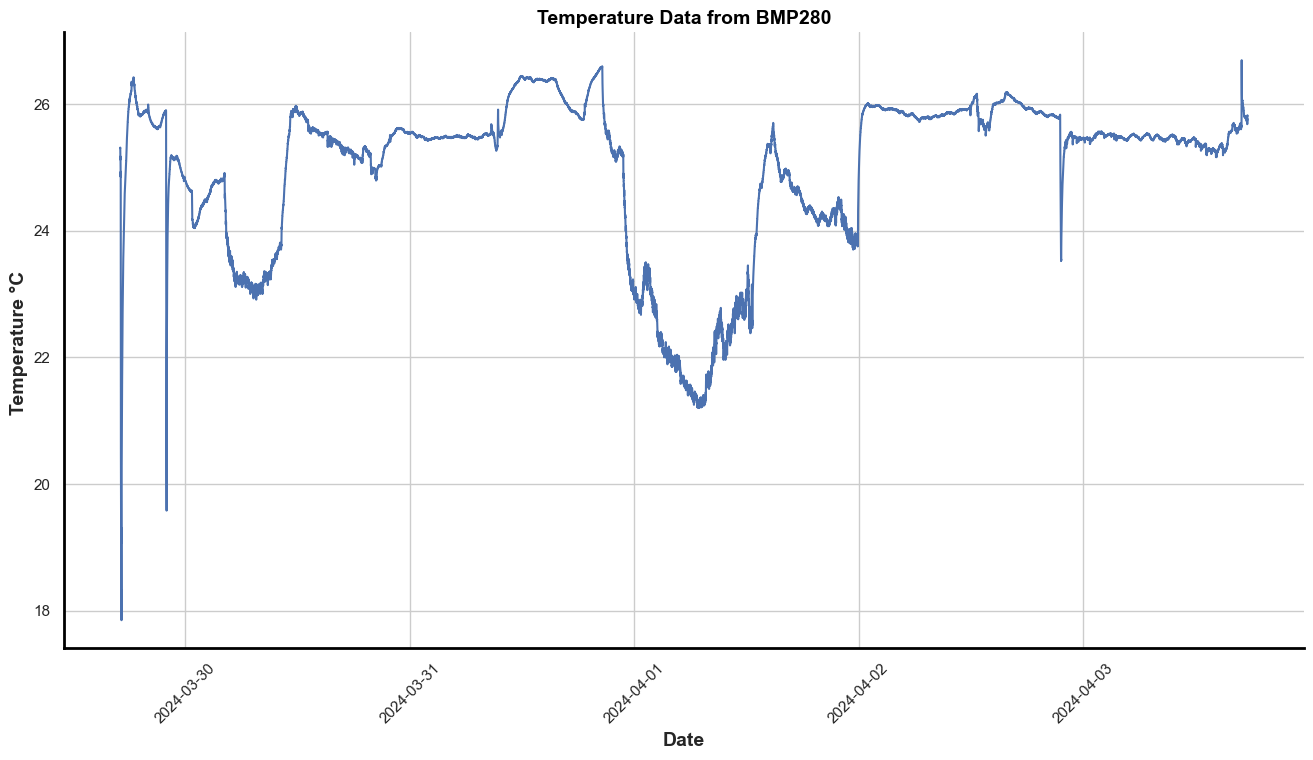

In [22]:
# Time series Plot for Temperature

plt.plot(df_BMP280_EXP01['Timestamp'], df_BMP280_EXP01['Temperature_C'])
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Temperature °C ', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

plt.title('Temperature Data from BMP280', fontsize=14, fontweight='bold', color='black')

sns.despine()
rcParams['axes.linewidth'] = 2
rcParams['axes.edgecolor'] = 'black'
rcParams['figure.figsize'] = (16, 8)
plt.show()

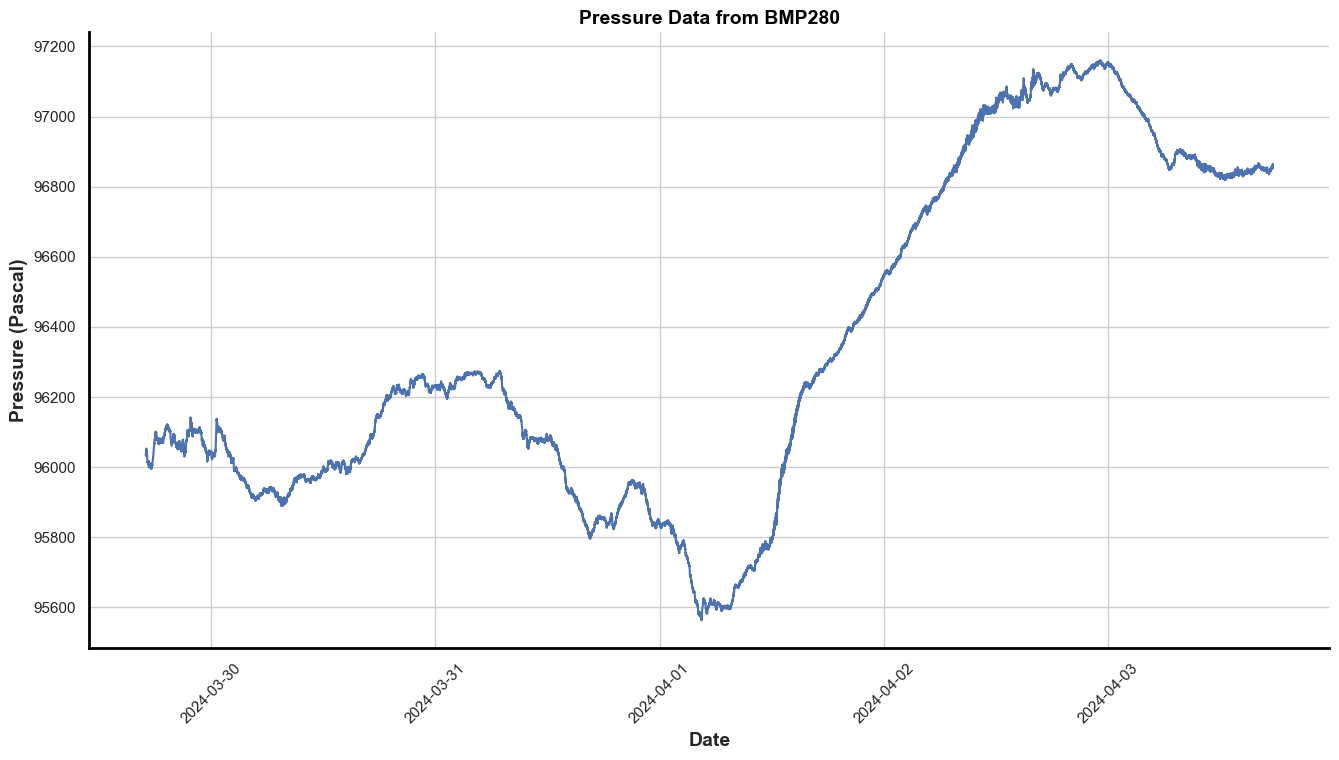

In [20]:
# Time series Plot for Pressure

plt.plot(df_BMP280_EXP01['Timestamp'], df_BMP280_EXP01['Pressure_P'])
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Pressure (Pascal)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

plt.title('Pressure Data from BMP280', fontsize=14, fontweight='bold', color='black')

sns.despine()
rcParams['axes.linewidth'] = 2
rcParams['axes.edgecolor'] = 'black'
rcParams['figure.figsize'] = (16, 8)
plt.show()

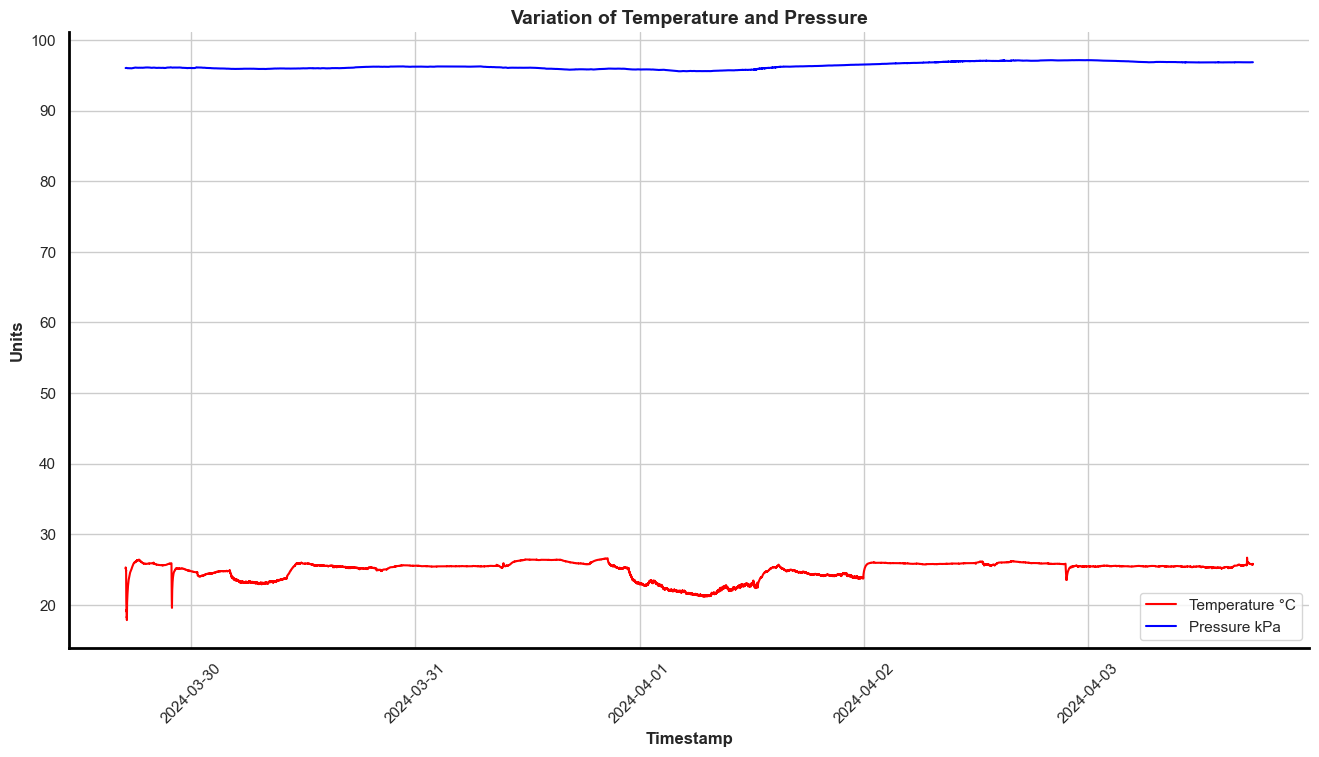

In [21]:
# Temperature and Pressure on the same plot

sns.lineplot(x='Timestamp', y='Temperature_C', data=df_BMP280_EXP01, color='red', label='Temperature °C')
sns.lineplot(x='Timestamp', y='Pressure_kPa' , data=df_BMP280_EXP01, color='blue', label='Pressure kPa')

plt.xticks(rotation=45)
plt.ylabel('Units', fontsize=12, fontweight='bold')
plt.xlabel('Timestamp', fontsize=12, fontweight='bold')

plt.title('Variation of Temperature and Pressure', fontsize=14, fontweight='bold')
plt.legend()

sns.despine()
rcParams['axes.linewidth'] = 2
rcParams['axes.edgecolor'] = 'black'
rcParams['figure.figsize'] = (16, 8)

#plt.savefig('MS1_Temp_Press_Time_Series_01', dpi=1200, bbox_inches='tight')
plt.show()